In [1]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from wordcloud import WordCloud

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

from pandas.tools.plotting import scatter_matrix
import nltk
from ast import literal_eval
from datetime import timedelta
import string
import statistics
import itertools

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import sys
sys.path.append('../')
import Variables as vr

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# create loader object
L = instaloader.Instaloader()
LIST_ALL_USERS = vr.LIST_ALL_USERS

nltk.download('stopwords')
nltk.download('punkt')


USE_LOCAL_DA = True

if (not USE_LOCAL_DA):
    
    # MongoDB Database
    instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
    instagram_db = instagramClient["Instagram"]
    instagram_col_post = instagram_db["Post_impersonator_h"]
    instagram_col_comment = instagram_db["Comment_impersonator_h"]
    instagram_col_like = instagram_db["Like_impersonator_h"]
    instagram_col_impersonator = instagram_db["Imp_impersonator_h"]

else:

    # MongoDB Database
    Local_instagramClient = pymongo.MongoClient('127.0.0.1:27017',authSource='Instagram')
    instagram_db = Local_instagramClient["Instagram"]
    instagram_col_post = instagram_db["Post_impersonator_h"]
    instagram_col_comment = instagram_db["Comment_impersonator_h"]
    instagram_col_like = instagram_db["Like_impersonator_h"]
    instagram_col_impersonator = instagram_db["Imp_impersonator_h"]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Load impersonator posts

In [3]:
# impersonator
_limit = 10000
df_impersonator =  pd.DataFrame(list(instagram_col_impersonator.find({}).limit(_limit) ))
df_impersonator.shape[0]

1829

In [4]:
# post
_limit = 10000
df_post =  pd.DataFrame(list(instagram_col_post.find({}).limit(_limit) ))
df_post.shape[0]

7254

In [5]:
df_post.columns

Index(['_id', 'associated_hashtag', 'associated_username',
       'post_associated_hashtag', 'post_associated_username', 'post_caption',
       'post_caption_hashtags', 'post_caption_mentions', 'post_comments',
       'post_date_utc', 'post_is_video', 'post_likes', 'post_location',
       'post_mediaid', 'post_owener_external_url',
       'post_owener_profile_pic_url', 'post_owner_biography',
       'post_owner_external_url', 'post_owner_followees',
       'post_owner_followers', 'post_owner_full_name', 'post_owner_id',
       'post_owner_is_private', 'post_owner_is_verified',
       'post_owner_mediacount', 'post_owner_profile_pic_url',
       'post_owner_similarity_biography', 'post_owner_similarity_full_name',
       'post_owner_similarity_photo', 'post_owner_similarity_username',
       'post_owner_username', 'post_shortcode', 'post_tagged_users',
       'post_thumbnail', 'post_typename', 'post_url', 'post_video_url',
       'post_viewer_has_liked'],
      dtype='object')

# get dataframes

In [6]:
# politician
df_post_trump = df_post.loc[
                        ( df_post['associated_username'] == vr.DONALD_TRUMP ) 
                       ] 

df_post_obama = df_post.loc[
                        ( df_post['associated_username'] == vr.BARACK_OBAMA ) 
                       ]

df_post_macron = df_post.loc[
                        ( df_post['associated_username'] == vr.EMMANUEL_MACRON ) 
                       ]

df_post_johnson = df_post.loc[
                        ( df_post['associated_username'] == vr.BORIS_JOHNSON ) 
                       ]

df_post_may = df_post.loc[
                        ( df_post['associated_username'] == vr.THERESA_MAY ) 
                       ]

# sport player
df_post_cristiano_ronalod = df_post.loc[
                        ( df_post['associated_username'] == vr.CRISTIANO_RONALDO ) 
                       ] 

df_post_leo_messi = df_post.loc[
                        ( df_post['associated_username'] == vr.LEOMESSI ) 
                       ]

df_post_roger_federer = df_post.loc[
                        ( df_post['associated_username'] == vr.ROGER_FEDERER ) 
                       ]

df_post_rafael_nadal = df_post.loc[
                        ( df_post['associated_username'] == vr.RAFAEL_NADAL ) 
                       ]

df_post_djokovic = df_post.loc[
                        ( df_post['associated_username'] == vr.NOVAK_DJOKOVIC ) 
                       ]

#singers
df_post_lady_gaga = df_post.loc[
                        ( df_post['associated_username'] == vr.LADY_GAGA ) #|
                       ] 

df_post_beyonce = df_post.loc[
                        ( df_post['associated_username'] == vr.BEYONCE ) 
                       ] 

df_post_taylor_swift = df_post.loc[
                        ( df_post['associated_username'] == vr.TAYLOR_SWIFT ) 
                       ] 

df_post_adele = df_post.loc[
                        ( df_post['associated_username'] == vr.ADELE ) 
                       ] 

df_post_madonna = df_post.loc[
                        ( df_post['associated_username'] == vr.MADONNA ) 
                       ] 

# Dataframe - Communities

In [8]:
# print("politician: " + str(df_politician.shape[0]))
# print("sport: " + str(df_sportplayer.shape[0]))
# print("musician: " + str(df_politician.shape[0]))

In [27]:
print("politician: " + str(df_politician.shape[0]))
print("sport: " + str(df_sportplayer.shape[0]))
print("musician: " + str(df_musician.shape[0]))

politician: 336
sport: 640
musician: 726


In [28]:
df_politician.columns

Index(['_id', 'associated_hashtag', 'associated_username', 'post_caption',
       'post_caption_hashtags', 'post_caption_mentions', 'post_comments',
       'post_date_utc', 'post_is_video', 'post_likes', 'post_location',
       'post_mediaid', 'post_owner_biography', 'post_owner_external_url',
       'post_owner_followees', 'post_owner_followers', 'post_owner_full_name',
       'post_owner_id', 'post_owner_is_private', 'post_owner_is_verified',
       'post_owner_mediacount', 'post_owner_profile_pic_url',
       'post_owner_similarity_biography', 'post_owner_similarity_full_name',
       'post_owner_similarity_photo', 'post_owner_similarity_username',
       'post_owner_username', 'post_shortcode', 'post_tagged_users',
       'post_thumbnail', 'post_typename', 'post_url', 'post_video_url',
       'post_viewer_has_liked'],
      dtype='object')

In [57]:
# df_politician.groupby('post_owner_id')

df_post_trump['post_date_utc'] = pd.to_datetime(df_post_trump['post_date_utc']) - pd.to_timedelta(30, unit='m')
df = df_post_trump.groupby(['post_owner_id', pd.Grouper(key='post_date_utc', freq='M')])['post_likes'].sum().reset_index().sort_values('post_date_utc')
    
df

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


post_owner_id post_date_utc  post_likes
13     5744028306    2019-08-31        2609
8      4522760521    2019-10-31         331
14     5744028306    2019-10-31        2552
10     4763857425    2019-10-31         343
16     6081691821    2019-10-31          18
6      3579886693    2019-10-31        3335
18     6328561624    2019-10-31         327
23     8522161918    2019-11-30        1285
25    11386758795    2019-11-30          30
22     8459156712    2019-11-30         995
26    11626077219    2019-11-30         341
21     7119279963    2019-11-30        7791
20     6684894532    2019-11-30         223
27    14964924085    2019-11-30          35
28    21689473079    2019-11-30        7887
19     6328561624    2019-11-30         128
24     9695468058    2019-11-30        1642
0        33098105    2019-11-30         129
15     5744028306    2019-11-30        3575
29    22457826756    2019-11-30          55
12     4785685743    2019-11-30          59
11     4763857425    2019-11-30         265
9      4522760521    2019-11-30         136
7      3579886693    2019-11-30         760
5      1924886127    2019-11-30         213
4      1390104699    2019-11-30          63
3       403220897    2019-11-30          13
2       334223147    2019-11-30          33
1       200224735    2019-11-30         200
17     6081691821    2019-11-30         747
30    22869580822    2019-11-30         136

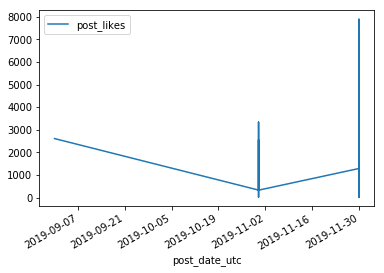

In [58]:
df.plot(x='post_date_utc', y='post_likes')

In [29]:
# df_post_trump = df_post_trump.set_index('post_date_utc')

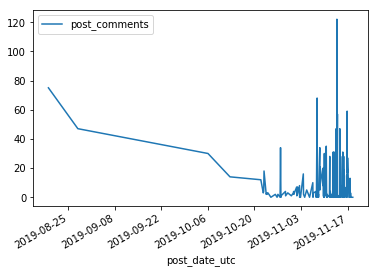

In [30]:
df_post_trump.plot(x='post_date_utc', y='post_comments')